In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from random import randint
from __future__ import division
from itertools import count
from numpy import linspace, loadtxt, ones, convolve
from matplotlib import dates
from sklearn.svm import OneClassSVM

%matplotlib inline

In [3]:
email_df = pd.read_csv("C:\\users\\kim\\downloads\\r2\\email.csv")

In [4]:
email_df.head()

,id,date,to,from
0,{M1X9-J6GI50JA-4977YAMB},1/4/2010 9:01:18,Carly.Kylie.Russell@dtaa.com,Daniel.Blair.Trevino@dtaa.com
1,{C3V5-T5TL85IA-1918CERV},1/4/2010 9:25:52,Martin.Reese.Pitts@dtaa.com;Eugenia.Dara.Steve...,Daniel.Blair.Trevino@dtaa.com
2,{B2S8-D2FS20OG-8752TEEA},1/4/2010 10:11:13,Benedict.Walker.Nieves@dtaa.com,Daniel.Blair.Trevino@dtaa.com
3,{W8V5-H1JO12GI-7106RZKE},1/4/2010 10:45:00,Kimberley.Jena.Patton@dtaa.com;Kiona.Amaya.May...,Daniel.Blair.Trevino@dtaa.com
4,{U8U6-J9RW34NA-6879KDTN},1/4/2010 10:50:29,Carly.Kylie.Russell@dtaa.com;Kiona.Amaya.Mayer...,Daniel.Blair.Trevino@dtaa.com


In [5]:
from datetime import datetime
email_df['new_date'] = email_df['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S').strftime("%m/%d/%Y"))

In [6]:
temp = email_df.groupby(['new_date','from'])['to'].size().reset_index(name='counts')
temp2 = temp.sort_values(by='new_date')
temp2['new_date2'] = temp2['new_date'].apply(lambda x: dates.date2num(datetime.strptime(x, "%m/%d/%Y")))
temp2 = temp2.sort_values(by='new_date2')

In [7]:
temp2.head()

,new_date,from,counts,new_date2
1011,01/04/2010,Ashely.Karly.Langley@dtaa.com,5,733776.0
1896,01/04/2010,Wylie.Jesse.Goff@dtaa.com,3,733776.0
1895,01/04/2010,Winter.Hadassah.Osborn@dtaa.com,2,733776.0
1894,01/04/2010,Winter.Anastasia.Webb@dtaa.com,1,733776.0
1893,01/04/2010,William.Zachery.Parks@dtaa.com,12,733776.0


In [11]:
temp2.head()

,new_date,from,counts,new_date2
1011,01/04/2010,Ashely.Karly.Langley@dtaa.com,5,733776.0
1896,01/04/2010,Wylie.Jesse.Goff@dtaa.com,3,733776.0
1895,01/04/2010,Winter.Hadassah.Osborn@dtaa.com,2,733776.0
1894,01/04/2010,Winter.Anastasia.Webb@dtaa.com,1,733776.0
1893,01/04/2010,William.Zachery.Parks@dtaa.com,12,733776.0


In [101]:
temp = temp2.groupby(['from','new_date']).sum().reset_index()
temp = temp.sort_values(by='new_date2')
users = temp['from'].unique()

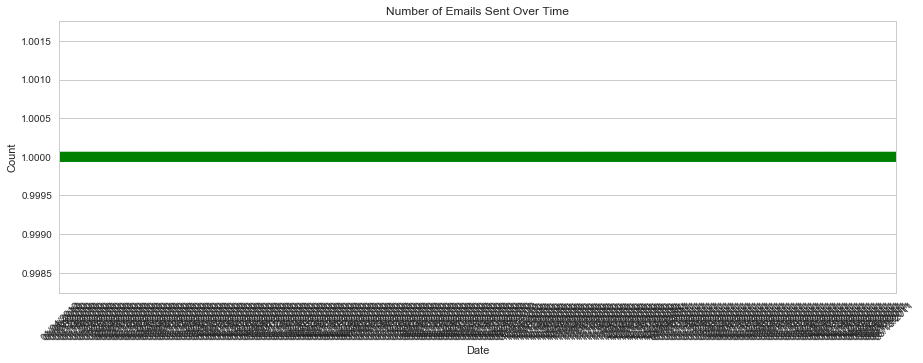

In [177]:
clf = OneClassSVM(kernel='linear')
sns.set_style("whitegrid")
for u in users:
    test = temp[temp['from']==u]

    X = test['counts'].as_matrix().reshape(-1, 1)
    clf.fit(X)
    array = clf.predict(X)
    new_df = pd.DataFrame(array, columns=['predict'])
    if new_df.predict.sum()*(-1) != len(new_df):
        print("Found outliers: ", u)
        test['predict'] = array
        test = test.dropna(axis=1, how='any')
        
        plt.figure(figsize=(15,5))
        point_plot = sns.pointplot(x='new_date', y='counts', hue='predict', data = test, color='g')
        
        for item in point_plot.get_xticklabels():
            item.set_rotation(45)
        
        plt.title('Number of Emails Sent Over Time')
        plt.xlabel('Date')
        plt.ylabel('Count')
        plt.show()
        

In [175]:
len(temp['from'].unique())

1000

In [185]:
temp = temp2.groupby(['from','new_date']).sum().reset_index()

In [187]:
temp3 = temp.groupby(['from'])['counts'].std().reset_index()

In [188]:
temp3

,from,counts
0,Aaron.Brent.Landry@dtaa.com,0.000000
1,Abel.Coby.Buchanan@dtaa.com,0.000000
2,Abel.William.Haley@dtaa.com,0.000000
3,Abigail.Zenia.Harrell@dtaa.com,0.000000
4,Abra.Kiayada.Burks@dtaa.com,0.000000
5,Abra.Martena.Johnston@dtaa.com,0.000000
6,Acton.Carter.Burns@dtaa.com,0.000000
7,Adara.Georgia.Barr@dtaa.com,0.000000
8,Adele.Zenia.Cannon@dtaa.com,0.000000
9,Adena.Sasha.Hatfield@dtaa.com,0.000000


In [189]:
temp3[temp3['counts']>0].count()

from      18
counts    18
dtype: int64

In [190]:
temp3 = temp3.reset_index()

In [191]:
temp3.head()

,index,from,counts
0,0,Aaron.Brent.Landry@dtaa.com,0.0
1,1,Abel.Coby.Buchanan@dtaa.com,0.0
2,2,Abel.William.Haley@dtaa.com,0.0
3,3,Abigail.Zenia.Harrell@dtaa.com,0.0
4,4,Abra.Kiayada.Burks@dtaa.com,0.0


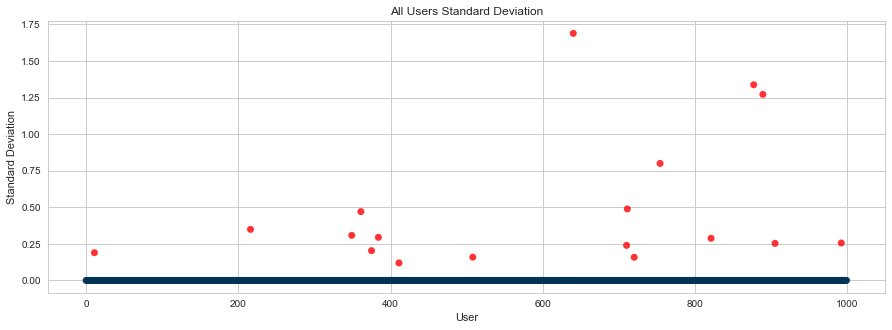

In [203]:
temp3['color']= np.where( temp3['counts'] > 0 , "#FF0000", "#003355")
plt.figure(figsize=(15,5))
g = sns.regplot(x='index', y='counts', data=temp3, fit_reg=False, scatter_kws={'facecolors':temp3['color']})
plt.title('All Users Standard Deviation')
plt.xlabel('User')
plt.ylabel('Standard Deviation')


plt.show()